In [8]:
import pandas as pd
import numpy as np

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [16]:
df = pd.read_csv("../DATASETS/NL_better/Current_updated.csv",delimiter=";")
df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by=['Date'])
df = df.set_index(df.Date)
df = df.drop(['Date'],axis=1)
df.head()

,Confirmed,Deaths,Recovered,start_date,lockdown_severity,maximum_together,mentality_grade,government_performance,kindergarten_closed,Highschool closed,...,FHNH,FXX,FXXH,TG,Population,Children born,Deats total,Immigration,Emmigration,Population Growth
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,1,1000,7.0,7,0,0,...,22,40,3,44,1740853,14015,14120,22081,15743,6233
2020-01-23,0,0,0,0,1,1000,7.0,7,0,0,...,1,30,6,37,1740853,14015,14120,22081,15743,6233
2020-01-24,0,0,0,0,1,1000,7.0,7,0,0,...,1,70,14,23,1740853,14015,14120,22081,15743,6233
2020-01-25,0,0,0,0,1,1000,7.0,7,0,0,...,6,60,2,20,1740853,14015,14120,22081,15743,6233
2020-01-26,0,0,0,0,1,1000,7.0,7,0,0,...,2,100,23,55,1740853,14015,14120,22081,15743,6233


# 1. Feature engineering

##### Add columns

## NaN handling

In [17]:
df.isna().any().any()

False

# 2. Feature selection

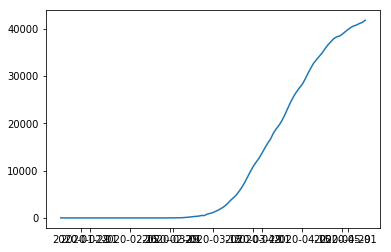

In [18]:
#Check if data is still sorted by date
plt.plot(df.Confirmed)

##### Auto encode columns with dtype object

In [25]:
# Show all dtypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 2020-01-22 to 2020-05-07
Columns: 103 entries, Confirmed to Population Growth
dtypes: float64(1), int64(102)
memory usage: 86.9 KB


##### Convert all dtypes to a float value

In [26]:
df = df.apply(pd.to_numeric)
df = df.astype(float)

##### Store DF

In [26]:
df.to_csv("df_num.csv")

## FROM HERE

In [27]:
df

,Confirmed,Deaths,Recovered,start_date,lockdown_severity,maximum_together,mentality_grade,government_performance,kindergarten_closed,Highschool closed,...,FHNH,FXX,FXXH,TG,Population,Children born,Deats total,Immigration,Emmigration,Population Growth
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,1.0,1000.0,7.0,7.0,0.0,0.0,...,22.0,40.0,3.0,44.0,1740853.0,14015.0,14120.0,22081.0,15743.0,6233.0
2020-01-23,0.0,0.0,0.0,0.0,1.0,1000.0,7.0,7.0,0.0,0.0,...,1.0,30.0,6.0,37.0,1740853.0,14015.0,14120.0,22081.0,15743.0,6233.0
2020-01-24,0.0,0.0,0.0,0.0,1.0,1000.0,7.0,7.0,0.0,0.0,...,1.0,70.0,14.0,23.0,1740853.0,14015.0,14120.0,22081.0,15743.0,6233.0
2020-01-25,0.0,0.0,0.0,0.0,1.0,1000.0,7.0,7.0,0.0,0.0,...,6.0,60.0,2.0,20.0,1740853.0,14015.0,14120.0,22081.0,15743.0,6233.0
2020-01-26,0.0,0.0,0.0,0.0,1.0,1000.0,7.0,7.0,0.0,0.0,...,2.0,100.0,23.0,55.0,1740853.0,14015.0,14120.0,22081.0,15743.0,6233.0
2020-01-27,0.0,0.0,0.0,0.0,1.0,1000.0,7.0,7.0,0.0,0.0,...,17.0,140.0,24.0,82.0,1740853.0,14015.0,14120.0,22081.0,15743.0,6233.0
2020-01-28,0.0,0.0,0.0,0.0,1.0,1000.0,7.0,7.0,0.0,0.0,...,5.0,180.0,11.0,54.0,1740853.0,14015.0,14120.0,22081.0,15743.0,6233.0
2020-01-29,0.0,0.0,0.0,0.0,1.0,1000.0,7.0,7.0,0.0,0.0,...,18.0,140.0,12.0,60.0,1740853.0,14015.0,14120.0,22081.0,15743.0,6233.0
2020-01-30,0.0,0.0,0.0,0.0,1.0,1000.0,7.0,7.0,0.0,0.0,...,15.0,150.0,23.0,85.0,1740853.0,14015.0,14120.0,22081.0,15743.0,6233.0


In [28]:
# df = pd.read_csv('df_num.csv')
# df.Date = pd.to_datetime(df.Date)
# df = df.sort_values(by=['Date'])
# df = df.set_index(df.Date)
# df = df.drop(['Date'],axis=1)
# df.head()

In [130]:
# plt.figure(figsize=(59,59))
# sns.heatmap(df.corr());§

# Feature selection

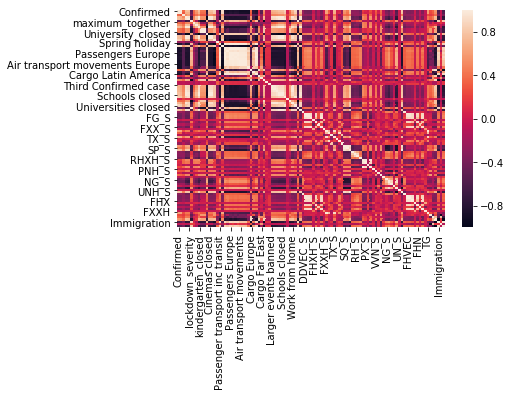

In [32]:
sns.heatmap(df.corr())

In [70]:
# def heatmap(x, y, size):
#     fig, ax = plt.subplots()
    
#     # Mapping from column names to integer coordinates
#     x_labels = [v for v in sorted(x.unique())]
#     y_labels = [v for v in sorted(y.unique())]
#     x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
#     y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
#     size_scale = 500
#     ax.scatter(
#         x=x.map(x_to_num), # Use mapping for x
#         y=y.map(y_to_num), # Use mapping for y
#         s=size * size_scale, # Vector of square sizes, proportional to size parameter
#         marker='s' # Use square as scatterplot marker
#     )
    
#     # Show column labels on the axes
#     ax.set_xticks([x_to_num[v] for v in x_labels])
#     ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
#     ax.set_yticks([y_to_num[v] for v in y_labels])
#     ax.set_yticklabels(y_labels)
  
#     ax.grid(False, 'major')
#     ax.grid(True, 'minor')
#     ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
#     ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    
#     ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
#     ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])

#     sns.palplot(sns.diverging_palette(220, 20, n=7))

#     plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
#     ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot

#     ax.scatter(
#         x=x.map(x_to_num), # Use mapping for x
#         y=y.map(y_to_num), # Use mapping for y
#         s=size * size_scale, # Vector of square sizes, proportional to size parameter
#         c=color.apply(value_to_color), # Vector of square colors, mapped to color palette
#         marker='s' # Use square as scatterplot marker
#     )
#     # ...

#     # Add color legend on the right side of the plot
#     ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

#     col_x = [0]*len(palette) # Fixed x coordinate for the bars
#     bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

#     bar_height = bar_y[1] - bar_y[0]
#     ax.barh(
#         y=bar_y,
#         width=[5]*len(palette), # Make bars 5 units wide
#         left=col_x, # Make bars start at 0
#         height=bar_height,
#         color=palette,
#         linewidth=0
#     )
#     ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
#     ax.grid(False) # Hide grid
#     ax.set_facecolor('white') # Make background white
#     ax.set_xticks([]) # Remove horizontal ticks
#     ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
#     ax.yaxis.tick_right() # Show vertical ticks on the right 


#     n_colors = 256 # Use 256 colors for the diverging color palette
#     palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
#     color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

# def value_to_color(val):
#     val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
#     ind = int(val_position * (n_colors - 1)) # target index in the color palette
#     return palette[ind]

#     ax.scatter(
#         x=x.map(x_to_num),
#         y=y.map(y_to_num),
#         s=size * size_scale,
#         c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
#         marker='s'
#     )
# data = df
# columns = df.columns[:10]
# corr = data[columns].corr()
# corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
# corr.columns = ['x', 'y', 'value']
# heatmap(
#     x=corr['x'],
#     y=corr['y'],
#     size=corr['value'].abs()
# )

In [33]:
labels = df.iloc[:,3:]
targetC = df.iloc[:,0]
targetD = df.iloc[:,1]
targetR = df.iloc[:,2]

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X, y = labels,targetC

In [140]:
# apply SelectKBest class to extract top 10 best features
X, y = labels,targetD
DeathBest = []
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(30,'Score'))  #print 10 best features
DeathBest.append(featureScores.nlargest(50,'Score'))
top_death_feat = DeathBest[0].iloc[:,0]

X, y = labels,targetC
ConfirmedBest = []
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(30,'Score'))  #print 10 best features
ConfirmedBest.append(featureScores.nlargest(20,'Score'))
top_conf_feat = ConfirmedBest[0].iloc[:,0]

# Feature importance

In [123]:
a = df[top_death_feat].corr()

In [125]:
columns = np.full((a.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] > 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
dfNew = df[selected_columns] 
dfNew

TypeError: '>' not supported between instances of 'str' and 'float'

In [137]:
labels = df.iloc[:,3:]
targetC = df.iloc[:,0]
targetD = df.iloc[:,1]
targetR = df.iloc[:,2]
X,y = labels,targetD

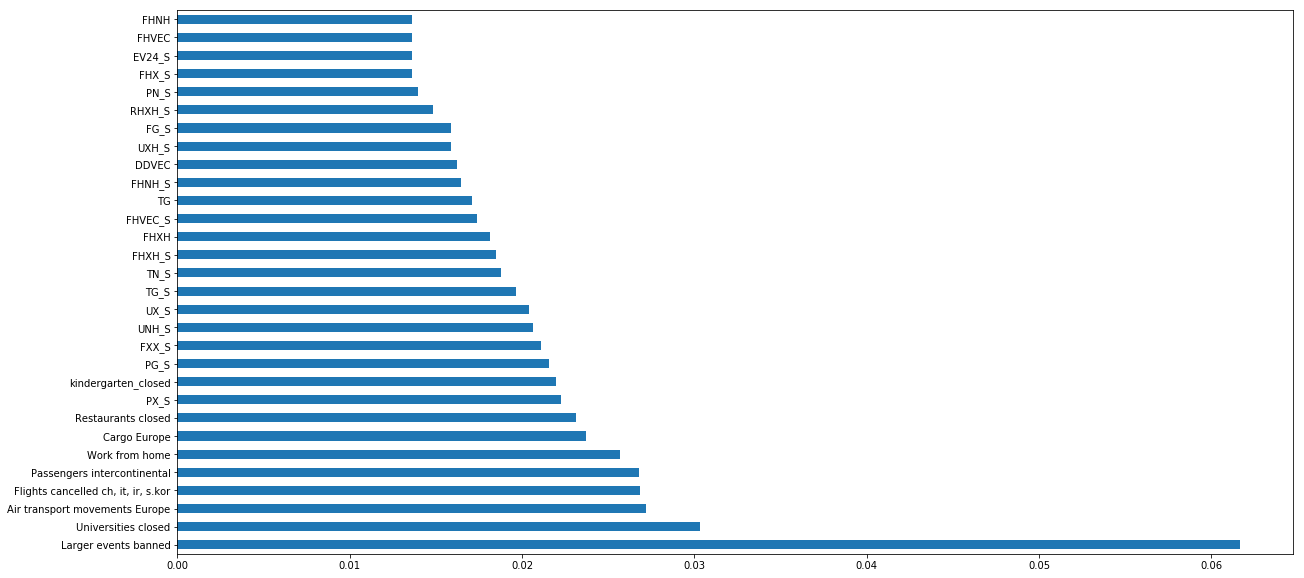

In [138]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

model = ExtraTreesClassifier()
model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [78]:
# import sklearn
# # sklearn.feature_selection.f_classif(X, y)
# sklearn.feature_selection.f_regression(X, y,center=True)
# plt.bar(X_indices - .45, scores, width=.2,
#         label=r'Univariate score ($-Log(p_{value})$)')

In [100]:
# corr_matrix = df.corr()
# top_feat_conf = corr_matrix["Confirmed"].sort_values(ascending=False)[:20]
# print(list(top_feat_conf.index))
# sns.heatmap(corr_matrix)

In [150]:
# apply SelectKBest class to extract top 10 best features
# X, y = labels,targetD
# DeathBest = []
# bestfeatures = SelectKBest(score_func=f_regression, k=10)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(50,'Score'))  #print 10 best features
# # DeathBest.append(featureScores.nlargest(50,'Score'))
# # top_death_feat = DeathBest[0].iloc[:,0]

X, y = labels,targetC
ConfirmedBest = []
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))  #print 10 best features
# ConfirmedBest.append(featureScores.nlargest(30,'Score'))
# top_conf_feat = ConfirmedBest[0].iloc[:,0]

                                       Specs       Score
14                            Transit direct  530.572765
23  Air transport movements intercontinental  468.691970
21                   Air transport movements  461.519447
22            Air transport movements Europe  459.453512
24                                     Cargo  409.170566
16                  Passengers non scheduled  378.132954
42                       Universities closed  344.898938
18               Passengers intercontinental  324.063198
20                       Passengers Transfer  289.215464
38            Stricter social distance rules  283.525698
13           Passenger transport inc transit  280.101584
15                      Passengers scheduled  279.571250
19                            Passengers O&D  268.414262
27                       Cargo Latin America  263.505771
17                         Passengers Europe  260.446050
11                                     Month  260.054808
83                             

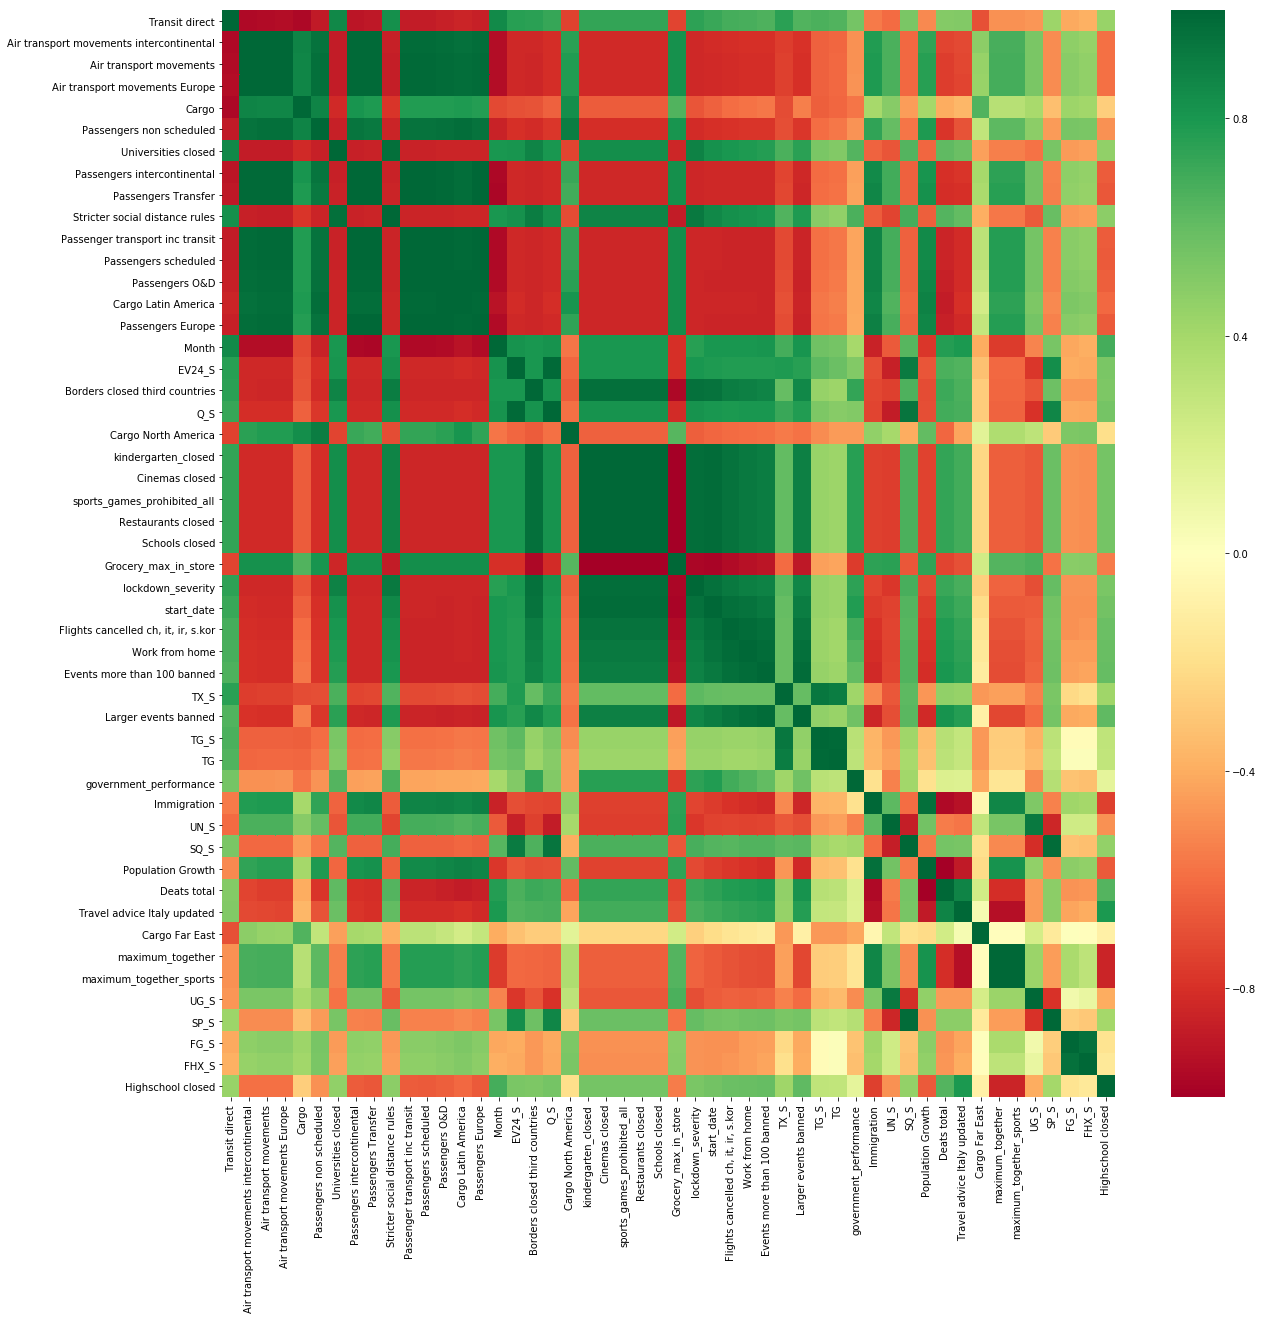

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset
corrmat = df.corr()
# top_corr_features = corrmat.index[:20]
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_conf_feat].corr(),annot=False,cmap="RdYlGn")

In [79]:
# corr = df.corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

In [143]:
# sns.set(style="white")
# # Create a covariance matrix
# corr = df.corr()
# # Creating a mask the size of our covariance matrix
# mask = np.zeros_like(corr, dtype=bool)
# mask[np.triu_indices_from(mask)] = True
# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11,9))
# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220,10,as_cmap=True)
# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
#             linewidth=.5, cbar_kws={'shrink': .5})
# # ax.set_title('Multi-Collinearity of Features')
# # plt.savefig('correlation2.png')

In [118]:
labels = df.iloc[:,3]
targetC = df.iloc[:,0]
targetD = df.iloc[:,1]
targetR = df.iloc[:,2]

In [120]:
# # pearson's correlation feature selection for numeric input and numeric output
# from sklearn.datasets import make_regression
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression
# # generate dataset
# X,y = labels, targetC
# # define feature selection
# fs = SelectKBest(score_func=f_regression, k=10)
# # apply feature selection
# # X_selected = fs.fit_transform(X, y)
# # print(X_selected.shape)

In [94]:
# X_selected = fs.fit_transform(X, y)

In [92]:
corr_matrix = df.corr()
top_feat_conf = corr_matrix["Confirmed"].sort_values(ascending=False)[:20]
print(list(top_feat_conf.index))
# sns.heatmap(corr_matrix)

['Confirmed', 'Deaths', 'Transit direct', 'Universities closed', 'Stricter social distance rules', 'Month', 'EV24_S', 'Borders closed third countries', 'Q_S', 'sports_games_prohibited_all', 'Cinemas closed', 'Schools closed', 'kindergarten_closed', 'Restaurants closed', 'lockdown_severity', 'start_date', 'Flights cancelled ch, it, ir, s.kor', 'Work from home', 'Events more than 100 banned', 'TX_S']


##### Compare correlation between features

In [47]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
dfNew = df[selected_columns] 
dfNew

,Confirmed,Recovered,start_date,maximum_together,mentality_grade,government_performance,Highschool closed,Grocery_max_in_store,Month,Spring holiday,...,UX_S,UXH_S,UNH_S,FHXH,FHNH,FXXH,Population,Children born,Immigration,Emmigration
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,0.0,...,98.0,5.0,2.0,1.0,22.0,3.0,1740853.0,14015.0,22081.0,15743.0
2020-01-23,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,0.0,...,98.0,1.0,19.0,6.0,1.0,6.0,1740853.0,14015.0,22081.0,15743.0
2020-01-24,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,0.0,...,96.0,21.0,13.0,11.0,1.0,14.0,1740853.0,14015.0,22081.0,15743.0
2020-01-25,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,0.0,...,98.0,24.0,12.0,2.0,6.0,2.0,1740853.0,14015.0,22081.0,15743.0
2020-01-26,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,0.0,...,98.0,1.0,18.0,24.0,2.0,23.0,1740853.0,14015.0,22081.0,15743.0
2020-01-27,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,0.0,...,95.0,2.0,13.0,24.0,17.0,24.0,1740853.0,14015.0,22081.0,15743.0
2020-01-28,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,0.0,...,92.0,6.0,15.0,11.0,5.0,11.0,1740853.0,14015.0,22081.0,15743.0
2020-01-29,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,0.0,...,81.0,1.0,13.0,9.0,18.0,12.0,1740853.0,14015.0,22081.0,15743.0
2020-01-30,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,0.0,...,97.0,19.0,12.0,1.0,15.0,23.0,1740853.0,14015.0,22081.0,15743.0


In [48]:
corr_matrix = dfNew.corr()
corr_matrix["Confirmed"].sort_values(ascending=False)

Confirmed                          1.000000
Month                              0.844021
start_date                         0.755488
TG_S                               0.632556
government_performance             0.582504
SQ_S                               0.574600
Travel advice Italy updated        0.535405
Highschool closed                  0.424012
Contact professions closed         0.412646
VVX_S                              0.398049
mentality_grade                    0.382383
Recovered                          0.367878
Cargo Europe                       0.351919
Children born                      0.331880
VVN_S                              0.321153
TN_S                               0.310316
Population                         0.247025
PG_S                               0.185585
Decline in patients                0.058756
PNH_S                              0.054826
TXH_S                              0.046641
PXH_S                              0.042529
VVNH_S                          

In [49]:
dfNew['Deaths'] = df['Deaths']
cols = list(dfNew.columns)
cols = [cols[-1]] + cols[:-1]
dfNew = dfNew[cols]
dfNew.head()

,Deaths,Confirmed,Recovered,start_date,maximum_together,mentality_grade,government_performance,Highschool closed,Grocery_max_in_store,Month,...,UX_S,UXH_S,UNH_S,FHXH,FHNH,FXXH,Population,Children born,Immigration,Emmigration
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,...,98.0,5.0,2.0,1.0,22.0,3.0,1740853.0,14015.0,22081.0,15743.0
2020-01-23,0.0,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,...,98.0,1.0,19.0,6.0,1.0,6.0,1740853.0,14015.0,22081.0,15743.0
2020-01-24,0.0,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,...,96.0,21.0,13.0,11.0,1.0,14.0,1740853.0,14015.0,22081.0,15743.0
2020-01-25,0.0,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,...,98.0,24.0,12.0,2.0,6.0,2.0,1740853.0,14015.0,22081.0,15743.0
2020-01-26,0.0,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,...,98.0,1.0,18.0,24.0,2.0,23.0,1740853.0,14015.0,22081.0,15743.0


In [98]:
# df.head()
dfNew.to_csv("Corrected_df.csv")